Text(0.5, 1.0, 'Прогноз температуры за период     01-06-2025 00:00:00 - 02-06-2025 23:00:00')

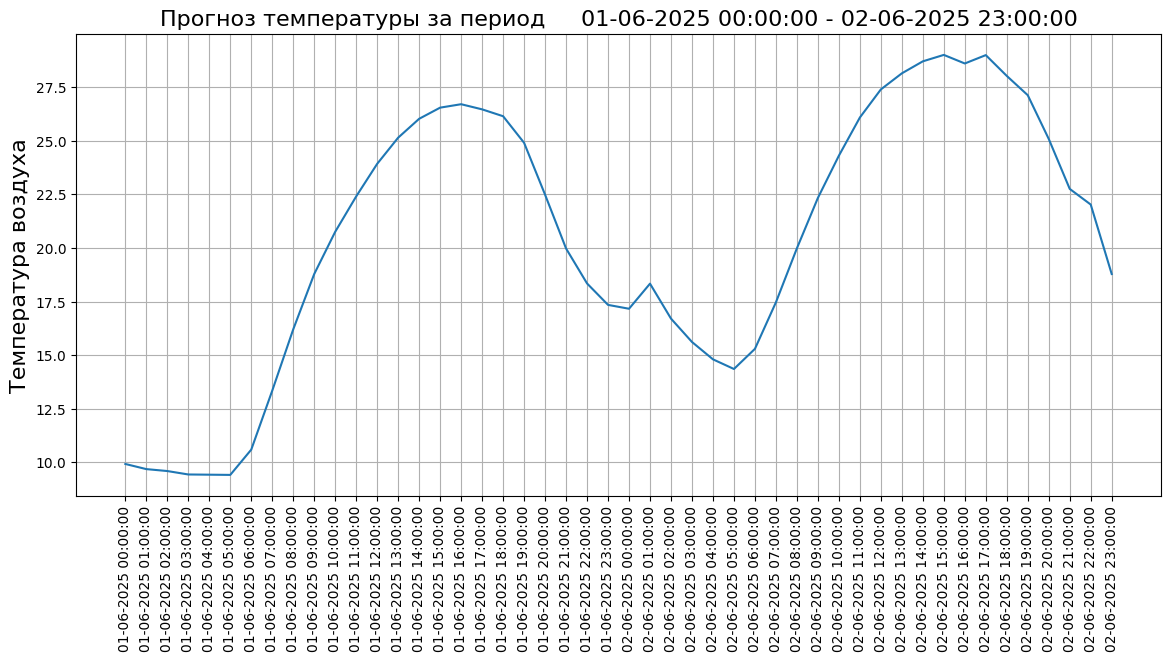

In [1]:
# С ПРОГНОЗОМ
import requests 
import pandas as pd 
import json
from datetime import datetime
from internal_data import weather_api
import seaborn as sns
import matplotlib.pyplot as plt


# Tomsk city center:
# lat = '56.48'
# lon = '84.98'

# Дача
lat = '56.3'
lon = '84.95'

# Sabetta plant area
# lat = '71.26'
# lon = '72.05'

# Krasnodar
# lat = '45.02'
# lon = '38.59'

url = f'https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&units={'metric'}&appid={weather_api}&lang={'ru'}'

response = requests.get(url)

data = response.json()

# !!!!!!!!! Есть проблемы с изменение тибличных данных. Появлиась вероятность, меняются дождь снег

forecast_df = pd.DataFrame(data['hourly'])

feats_to_convert = ['dt']


def ts_convert(ts):
    return datetime.fromtimestamp(ts).strftime('%d-%m-%Y %H:%M:%S')

for feat in feats_to_convert:
    forecast_df[feat] = forecast_df[feat].apply(ts_convert)
    

def description_extract(data):

    result = f'{data[0]['main']} : {data[0]['description']}'

    return result
    
forecast_df['info'] = forecast_df['weather'].apply(description_extract)

forecast_df = forecast_df.drop('weather', axis=1)

# Преобразование признаков осадков (изначально словарь либо None)
# forecast_df['rain'] = forecast_df['rain'].apply(lambda x: 
#     list(x.values())[0] if type(x) is dict else 0
#     )

# forecast_df['snow'] = forecast_df['snow'].apply(lambda x: 
#     list(x.values())[0] if type(x) is dict else 0
#     )



fig = plt.figure(figsize=(14,6))

line_graph = sns.lineplot(
    data = forecast_df, 
    x = 'dt',
    y = 'temp'
    )

line_graph.grid()

line_graph.set_ylabel('Температура воздуха', fontsize = 16)
line_graph.set_xlabel('')
plt.tick_params(axis='x', labelrotation = 90)

line_title_name = f'Прогноз температуры за период \
    {forecast_df.iloc[0]['dt']} - {forecast_df.iloc[47]['dt']}'

line_graph.set_title(line_title_name, fontsize = 16)

In [10]:
list(forecast_df.columns)

['dt',
 'temp',
 'feels_like',
 'pressure',
 'humidity',
 'dew_point',
 'uvi',
 'clouds',
 'visibility',
 'wind_speed',
 'wind_deg',
 'wind_gust',
 'pop',
 'info']

In [ ]:
import ast

def hourly_value_decoder(value):
    """Fuction to convert str data to numeric value in the 
    rain and snow forecast

    Args:
        value (str): it's a str value in dict-like form

    Returns:
        float: value of forecasted volume of participations
    """
    
    # if there was no data cell has been filled with zero, in this case 
    # no decoder is required
    if value != 0:
        hourly_dict = ast.literal_eval(value.strip())
        float_value = hourly_dict.get('1h')
        result = float_value
    
    else:
        result = value
    
    return result

if 'rain' not in list(forecast_df.columns):
    forecast_df['rain'] = 0
else:
    forecast_df['rain'] = forecast_df['rain'].fillna(0)
    forecast_df['rain'] = forecast_df['rain'].apply(hourly_value_decoder)

if 'snow' not in list(forecast_df.columns):
    forecast_df['snow'] = 0
else:
    forecast_df['snow'] = forecast_df['snow'].fillna(0)
    forecast_df['snow'] = forecast_df['snow'].apply(hourly_value_decoder)
    
forecast_df

SyntaxError: invalid syntax (1803060813.py, line 11)

In [3]:
forecast_df['details'] = forecast_df['info'].apply(lambda x: x.split(':')[1])

In [68]:
forecast_df.head(10)

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,pop,rain,snow,info,details
0,20-04-2025 23:00:00,0.61,-2.83,998,99,0.47,0.00,100,427,3.07,240,8.82,0.80,NaN,NaN,Clouds : пасмурно,пасмурно
1,21-04-2025 00:00:00,0.40,-3.51,998,98,0.12,0.00,100,4400,3.61,258,8.14,0.00,NaN,NaN,Clouds : пасмурно,пасмурно
2,21-04-2025 01:00:00,0.65,-3.37,998,97,0.23,0.00,100,6785,3.83,266,9.01,0.00,NaN,NaN,Clouds : пасмурно,пасмурно
3,21-04-2025 02:00:00,0.92,-2.67,998,98,0.64,0.00,100,1497,3.33,257,9.59,0.20,{'1h': 0.16},NaN,Rain : небольшой дождь,небольшой дождь
4,21-04-2025 03:00:00,1.32,-2.08,999,98,1.04,0.00,100,896,3.20,262,9.20,0.00,NaN,NaN,Clouds : пасмурно,пасмурно
5,21-04-2025 04:00:00,1.63,-2.38,1000,98,1.35,0.00,100,60,4.16,281,9.71,0.20,{'1h': 0.13},NaN,Rain : небольшой дождь,небольшой дождь
6,21-04-2025 05:00:00,1.22,-2.97,1001,92,-0.01,0.13,100,10000,4.29,273,11.21,0.15,NaN,NaN,Clouds : пасмурно,пасмурно
7,21-04-2025 06:00:00,1.75,-2.88,1002,77,-2.01,0.44,100,10000,5.29,276,11.29,0.11,NaN,NaN,Clouds : пасмурно,пасмурно
8,21-04-2025 07:00:00,1.78,-3.06,1003,73,-2.67,0.96,98,10000,5.73,284,12.18,0.04,NaN,NaN,Clouds : пасмурно,пасмурно
9,21-04-2025 08:00:00,1.85,-2.95,1004,71,-2.86,1.45,77,10000,5.68,286,10.69,0.15,NaN,NaN,Clouds : облачно с прояснениями,облачно с прояснениями


In [19]:
import re
import ast

In [22]:
a = "{'1h': 0.16}	"
b = ast.literal_eval(a.strip())

c = b.get('1h')
type(c)

float

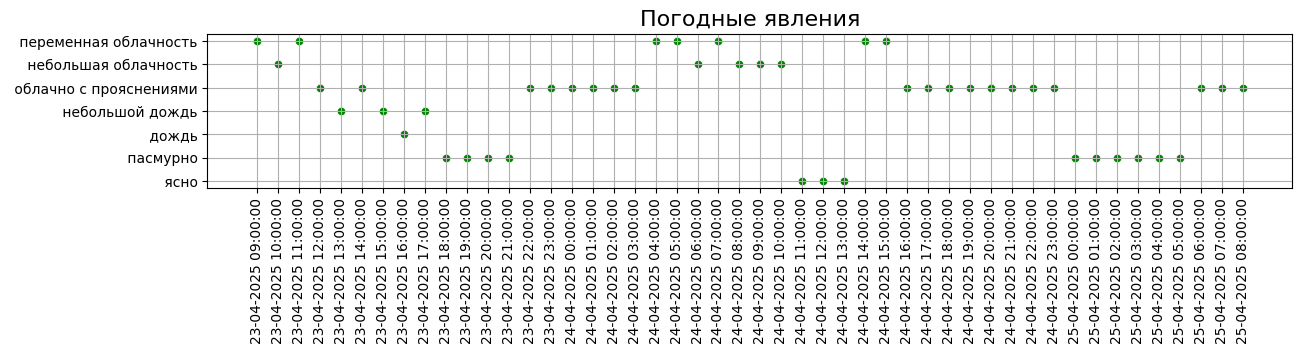

In [4]:
forecast_df

fig = plt.figure(figsize=(14,2))

details_scatter = sns.scatterplot(
    data=forecast_df,
    x='dt',
    y='details',
    color="green"
    )


details_scatter.grid()
details_scatter.set_ylabel('')
details_scatter.set_xlabel('')
details_scatter.set_title('Погодные явления', fontsize = 16)
plt.tick_params(axis='x', labelrotation = 90)

plt.show()

C:\Users\nitys\AppData\Local\Temp\ipykernel_11424\1199592861.py:21: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([hist_gust, hist_wind], ['Порывы ветра', 'Скорость ветра'])


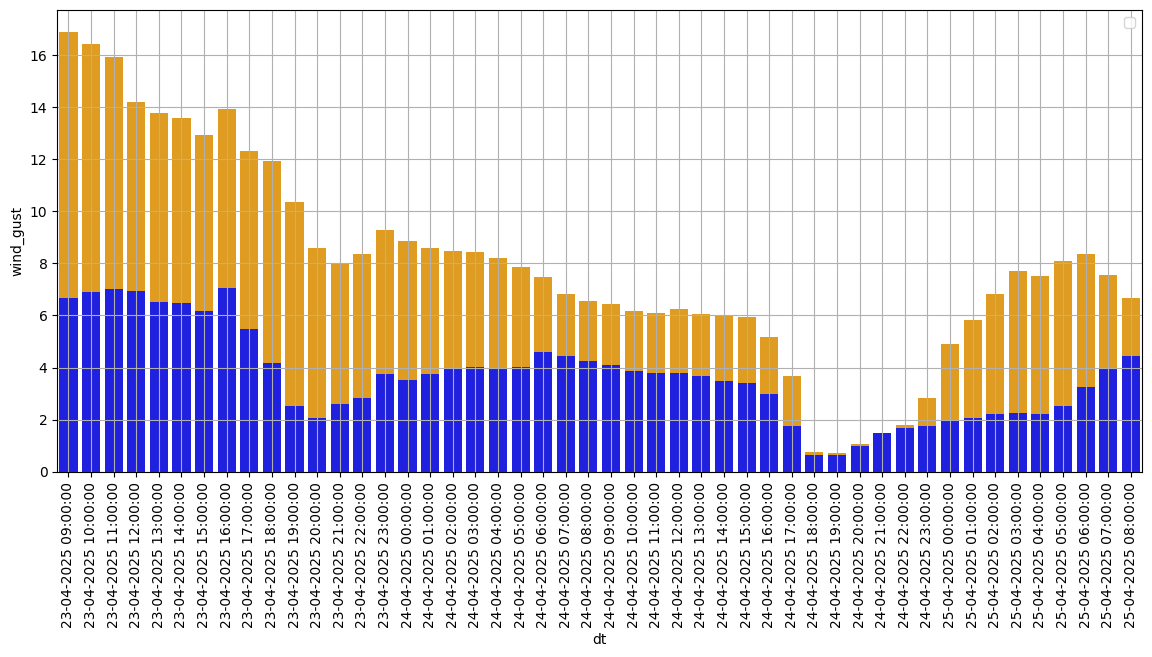

In [5]:
fig = plt.subplots(figsize = (14,6))

hist_gust = sns.barplot(
    data = forecast_df,
    x = 'dt', 
    y='wind_gust',
    color='orange'
)

hist_wind = sns.barplot(
    data = forecast_df,
    x = 'dt', 
    y='wind_speed',
    color='blue'
)

plt.grid()

plt.tick_params(axis='x', labelrotation = 90)

plt.legend([hist_gust, hist_wind], ['Порывы ветра', 'Скорость ветра'])


TypeError: unhashable type: 'dict'

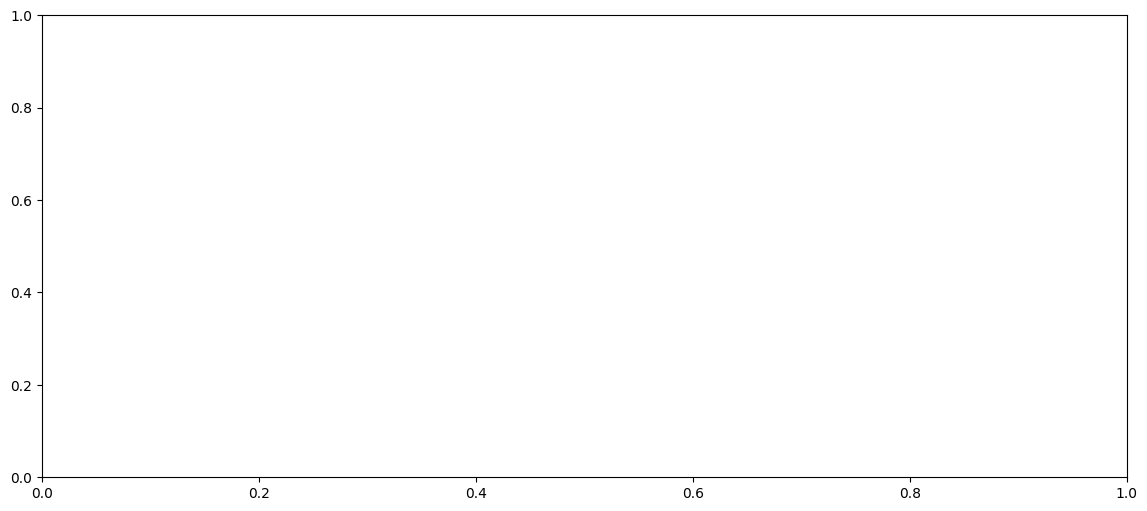

In [6]:
fig = plt.subplots(figsize = (14,6))

hist_rain = sns.barplot(
    data = forecast_df,
    x = 'dt', 
    y='rain',
    color='blue'
)

hist_rain.set_ylabel('Уровень дождя, см', fontsize = 16)
hist_rain.set_xlabel('')
plt.tick_params(axis='x', labelrotation = 90)
plt.grid()

hist_rain_title_name = f'Прогноз дождевых осадков, см за\
    {forecast_df.iloc[0]['dt']} - {forecast_df.iloc[47]['dt']}'

hist_rain.set_title(hist_rain_title_name, fontsize = 16)

plt.show(hist_rain)

In [15]:
forecast_df['pop'].value_counts()

pop
0.00    22
1.00     3
0.94     2
0.85     2
0.86     2
0.98     2
0.92     2
0.76     2
0.95     1
0.57     1
0.17     1
0.99     1
0.81     1
0.78     1
0.20     1
0.49     1
0.18     1
0.89     1
0.80     1
Name: count, dtype: int64

ValueError: Could not interpret value `snow` for `y`. An entry with this name does not appear in `data`.

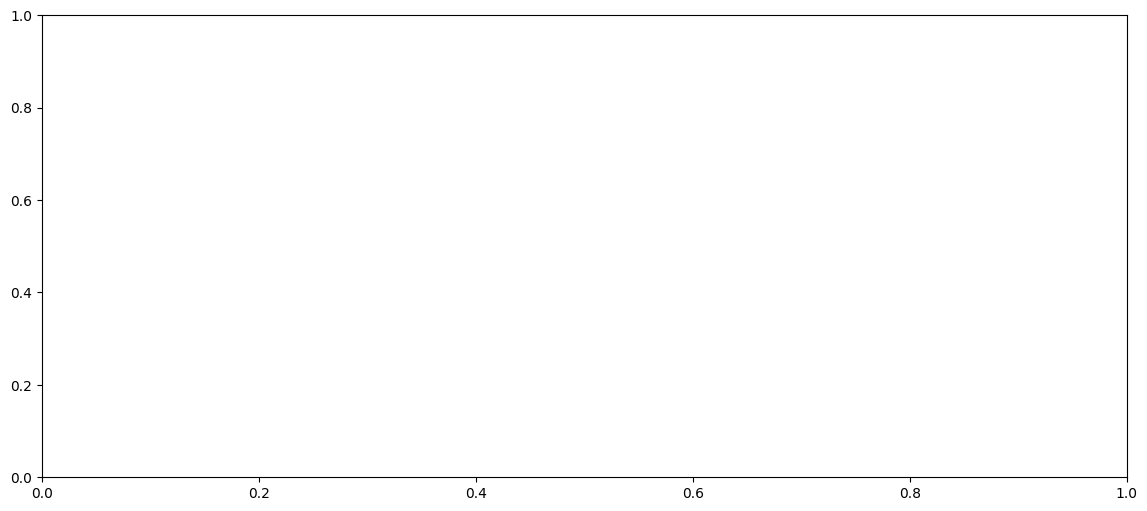

In [7]:
fig = plt.subplots(figsize = (14,6))

hist_snow = sns.barplot(
    data = forecast_df,
    x = 'dt', 
    y='snow',
    color='blue'
)

hist_snow.set_ylabel('Уровень снега, см', fontsize = 16)
hist_snow.set_xlabel('')
plt.tick_params(axis='x', labelrotation = 90)
plt.grid()

hist_snow_title_name = f'Прогноз снежных осадков, см за\
    {forecast_df.iloc[0]['dt']} - {forecast_df.iloc[47]['dt']}'

hist_snow.set_title(hist_snow_title_name, fontsize = 16)

# plt.show(hist_snow)
plt.savefig('snow_forecast.jpg')

Text(0.5, 1.0, 'Прогноз температуры за период     19-04-2025 02:00:00 - 21-04-2025 01:00:00')

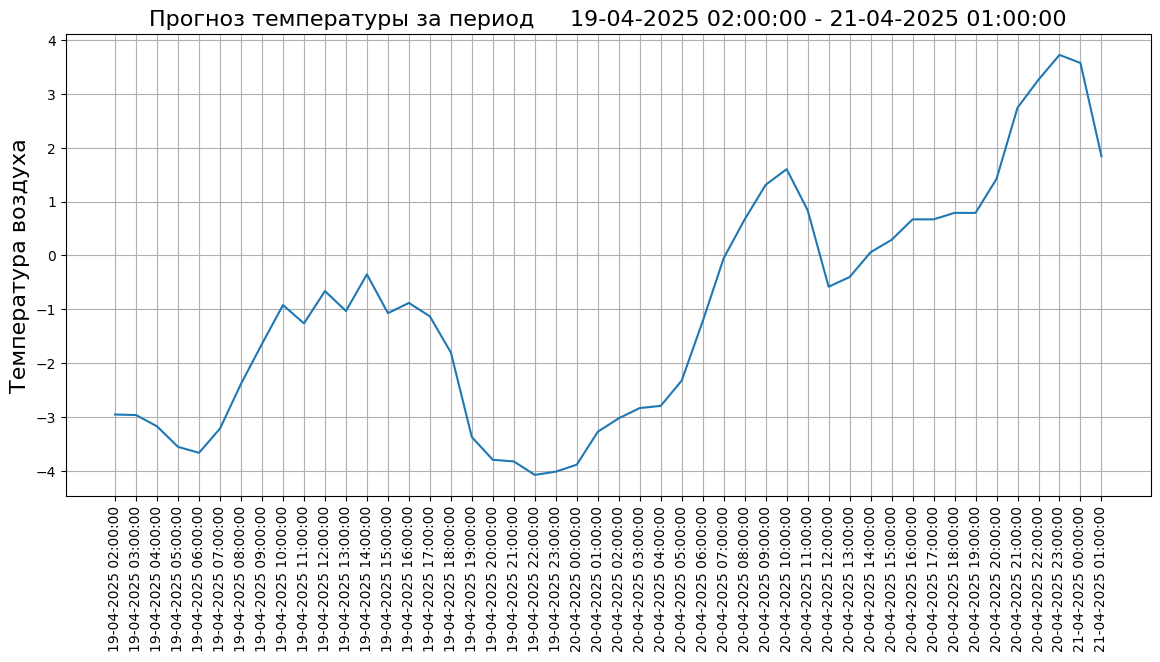

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(14,6))

line_graph = sns.lineplot(
    data = forecast_df, 
    x = 'dt',
    y = 'temp'
    )

line_graph.grid()

line_graph.set_ylabel('Температура воздуха', fontsize = 16)
line_graph.set_xlabel('')
plt.tick_params(axis='x', labelrotation = 90)

line_title_name = f'Прогноз температуры за период \
    {forecast_df.iloc[0]['dt']} - {forecast_df.iloc[47]['dt']}'

line_graph.set_title(line_title_name, fontsize = 16)
